In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [19]:
connection = sqlite3.connect('station-database.db')
query = 'SELECT * FROM station'
df = pd.read_sql_query(query,connection)
connection.close()

In [ ]:
df.head()

,id,name,owner,country,year
0,1,Falcon 9 Block 5 | Starlink Group 6-24,SpaceX,USA,2023
1,2,Long March 2D | Unknown Payload,CASC,China,2023
2,3,Long March 2F/G | Shenzhou 17,CASC,China,2023
3,4,Falcon 9 Block 5 | Starlink Group 7-6,SpaceX,USA,2023
4,5,Falcon 9 Block 5 | Starlink Group 6-25,SpaceX,USA,2023




---


**VISUALISATION**

In [20]:
# Assuming 'df' is your DataFrame with 'year' and 'country' columns
# Create a DataFrame with the count of occurrences of each country
country_counts = df['country'].value_counts()

In [21]:
# Get the unique years from the 'year' column
years = df['year'].unique()

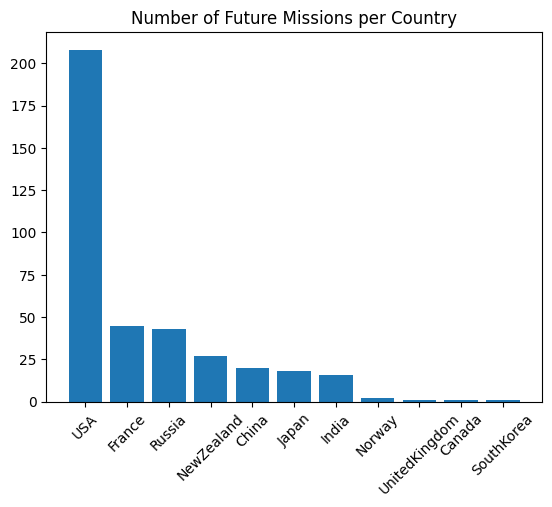

In [5]:
# Create a bar plot to show the number of times each country appears
plt.bar(country_counts.index, country_counts.values)

plt.title('Number of Future Missions per Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [ ]:
# INTERACTIVE

In [6]:
import plotly.express as px
import plotly.graph_objects as go

In [22]:
# Assuming 'df' is your DataFrame with 'year' and 'country' columns
# Create a DataFrame with the count of occurrences of each country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(country_counts, x='country', y='count', title='Number of Occurrences of Each Country')
fig.update_xaxes(categoryorder='total descending')

# Show the interactive plot in a Jupyter Notebook or a web browser
fig.show()

In [23]:
# HORIZONTAL BAR CHART
# Count the occurrences of each country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

colours = ['#000033','blue','green','black','red','white','#E0E0E0','yellow','orange','brown','purple']

fig = px.bar(country_counts, y='country', x='count', orientation='h', title='Number of Missions by Country',color=colours)
fig.update_layout(yaxis_title='Country', xaxis_title='Count')
fig.update_yaxes(categoryorder='total ascending')


# Show the interactive plot
fig.show()

In [24]:
# Count the occurrences of each company
company_counts = df.owner.value_counts().reset_index()
company_counts.columns = ['Enterprise', 'Count']

# Create a pie chart using Plotly Express
fig = px.pie(company_counts, names='Enterprise', values='Count', title='Company Distribution Pie Chart')

fig.show()

In [25]:
# GETTING PAST DATA
connection = sqlite3.connect('station-database-past.db')
query = 'SELECT * FROM station'
df_past = pd.read_sql_query(query,connection)
connection.close()

In [15]:
country_counts_past = df['country'].value_counts().reset_index()
country_counts_past.columns = ['country', 'count']

In [31]:

# Assuming you have two DataFrames: df for future missions and df_past for past missions
# Add a 'Mission Type' column to differentiate past and future missions
df['Mission Type'] = 'Future'
df_past['Mission Type'] = 'Past'

# Add a dummy column to both DataFrames to represent the number of missions
df['Mission Count'] = 1
df_past['Mission Count'] = 1

# Concatenate the two DataFrames
combined_df = pd.concat([df, df_past], ignore_index=True)

# Group by country and Mission Type, and count the number of missions
grouped_data = combined_df.groupby(['country', 'Mission Type']).size().reset_index(name='Count')

# Sort the data frame by 'Count' column in descending order
grouped_data = grouped_data.sort_values(by='Count', ascending=False)

# Limit the results to the top 7 countries
grouped_data = grouped_data.head(7)

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='country', y='Count', color='Mission Type', labels={'Mission Type': 'Mission Type'})
fig.update_layout(title='Past and Future Missions by Country', xaxis_title='Country', yaxis_title='Number of Missions')

# Show the chart
fig.show()

In [34]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df, x=df.country, y=df.year, title='Years and Planned Missions by Country')

# Show the plot
fig.show()